Negara-negara mana yang sebaiknya diberikan bantuan oleh negara donor? Kasus ini merupakan contoh dari Unsupervised Learning karena kita tidak memiliki label kelayakan penerima donor pada data negara di dataset. Kita akan menambahkan satu kolom baru pada dataset yang berisikan nilai apakah suatu negara adalah pemberi bantuan atau penerima bantuan. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
dataset_awal = pd.read_csv('https://raw.githubusercontent.com/smirzap/AI-dengan-DL/main/data/Country-data.csv')

In [3]:
dataset_awal.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
dataset_awal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
dataset_awal.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [6]:
dataset = dataset_awal.drop('country', axis=1)
dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

dataset_std = scaler.fit_transform(dataset)

In [8]:
pd.DataFrame(data=dataset_std, columns=dataset.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-3.722904e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
exports,167.0,2.127373e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
health,167.0,5.504579e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
imports,167.0,2.765585e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
income,167.0,-7.977650e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
inflation,167.0,-1.063687e-17,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
life_expec,167.0,3.696311e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fer,167.0,3.044803e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
gdpp,167.0,5.850277e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


In [9]:
model = KMeans(2, random_state=42)

In [10]:
clusters = model.fit_predict(dataset_std)

In [11]:
print(clusters)

[0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0]


In [12]:
dataset_awal['cluster'] = clusters

In [13]:
dataset_awal[['country', 'cluster']].head(5)

,country,cluster
0,Afghanistan,0
1,Albania,1
2,Algeria,0
3,Angola,0
4,Antigua and Barbuda,1


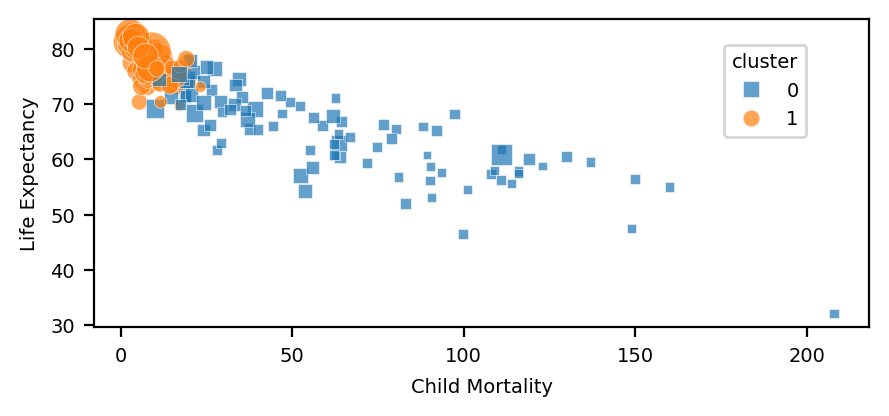

In [14]:
plt.rcParams["font.size"] = 7

plt.figure(figsize=(5,2), dpi=200)

#sns.set_theme(style="white", font_scale=0.5)

p=sns.scatterplot(data=dataset_awal, x='child_mort', y='life_expec', hue='cluster', size='income', sizes=(10,200), style='cluster', alpha=0.7, markers=['s', 'o'])

p.set_xlabel('Child Mortality')
p.set_ylabel('Life Expectancy')

h,l = p.get_legend_handles_labels()
plt.legend(h[1:3],l[1:3], loc=2, bbox_to_anchor=(0.8, 0.95), title='cluster')
